In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = "logs/content/logs/ppo/Walker2d-v4_4"

In [3]:
path_2 = "logs/content/logs/ppo/Walker2d-v4_5"

In [4]:
stats = []
# Walk through the directory
for root, dirs, files in os.walk(top="logs/content/logs/ppo/Walker2d-v4_4"):
    for file in files:  # Iterate over the files in the current directory
        if file.endswith(".csv"):  # Check if the file has a .csv extension
            stats.append(os.path.join(root, file))  # Add the full file path to stats

# Print the collected stats
print(stats)


['logs/content/logs/ppo/Walker2d-v4_4/2.monitor.csv', 'logs/content/logs/ppo/Walker2d-v4_4/1.monitor.csv', 'logs/content/logs/ppo/Walker2d-v4_4/3.monitor.csv', 'logs/content/logs/ppo/Walker2d-v4_4/0.monitor.csv']


In [5]:
stats_2 = []
# Walk through the directory
for root, dirs, files in os.walk(top="logs/content/logs/ppo/Walker2d-v4_5"):
    for file in files:  # Iterate over the files in the current directory
        if file.endswith(".csv"):  # Check if the file has a .csv extension
            stats_2.append(os.path.join(root, file))  # Add the full file path to stats

# Print the collected stats
print(stats)


['logs/content/logs/ppo/Walker2d-v4_4/2.monitor.csv', 'logs/content/logs/ppo/Walker2d-v4_4/1.monitor.csv', 'logs/content/logs/ppo/Walker2d-v4_4/3.monitor.csv', 'logs/content/logs/ppo/Walker2d-v4_4/0.monitor.csv']


In [6]:
stats_3 = []
# Walk through the directory
for root, dirs, files in os.walk(top="colab"):
    for file in files:  # Iterate over the files in the current directory
        if file.endswith(".csv"):  # Check if the file has a .csv extension
            stats_3.append(os.path.join(root, file))  # Add the full file path to stats

# Print the cosllected stats
print(stats)


['logs/content/logs/ppo/Walker2d-v4_4/2.monitor.csv', 'logs/content/logs/ppo/Walker2d-v4_4/1.monitor.csv', 'logs/content/logs/ppo/Walker2d-v4_4/3.monitor.csv', 'logs/content/logs/ppo/Walker2d-v4_4/0.monitor.csv']


In [7]:
data_arrays = []
for file_path in stats:
    data = np.genfromtxt(file_path, delimiter=',', skip_header=2)
    print(data.shape)
    data_arrays.append(data)

(527, 3)
(515, 3)
(503, 3)
(505, 3)


In [8]:
data_arrays2 = []
for file_path in stats_2:
    data = np.genfromtxt(file_path, delimiter=',', skip_header=2)
    print(data.shape)
    data_arrays2.append(data)

(433, 3)
(429, 3)
(446, 3)
(449, 3)


In [9]:
data_arrays3 = []
for file_path in stats_3:
    data = np.genfromtxt(file_path, delimiter=',', skip_header=2)
    print(data.shape)
    data_arrays3.append(data)

(250, 3)
(256, 3)
(252, 3)
(253, 3)


In [10]:
data_arrays3

[array([[7.53459815e+02, 2.24000000e+02, 2.08483000e+00],
        [4.05032379e+03, 1.00000000e+03, 1.73916510e+01],
        [7.56315131e+02, 2.46000000e+02, 1.79041350e+01],
        [3.87850304e+03, 1.00000000e+03, 3.24232640e+01],
        [2.46466757e+03, 6.05000000e+02, 4.61060430e+01],
        [1.19714549e+03, 3.29000000e+02, 4.67877370e+01],
        [1.07722002e+03, 3.14000000e+02, 5.42081890e+01],
        [4.00214931e+03, 1.00000000e+03, 6.87553810e+01],
        [1.70122358e+03, 4.34000000e+02, 7.53812440e+01],
        [3.90211671e+03, 1.00000000e+03, 8.98756500e+01],
        [3.62644752e+03, 8.77000000e+02, 1.03159773e+02],
        [4.01817765e+03, 1.00000000e+03, 1.17692679e+02],
        [2.91309314e+03, 7.22000000e+02, 1.31451441e+02],
        [4.15603401e+03, 1.00000000e+03, 1.45921041e+02],
        [3.88841296e+03, 1.00000000e+03, 1.54770271e+02],
        [3.37393767e+03, 8.53000000e+02, 1.69040304e+02],
        [3.77506351e+03, 1.00000000e+03, 1.88642333e+02],
        [4.139

In [11]:
combined_data = []


In [12]:
import numpy as np

# Combine corresponding arrays from data_arrays and data_arrays2

# Assuming both data_arrays and data_arrays2 have the same structure (4 arrays each)
for i in range(len(data_arrays)):
    combined_array = np.vstack((data_arrays[i], data_arrays2[i],data_arrays3[i] ))  # Stack along rows
    # combined_array = np.vstack((combined_array[i], data_arrays3[i]))  # Stack along rows
    combined_data.append(combined_array)

# Verify the shapes
for idx, array in enumerate(combined_data):
    combined_data[idx] = array[:1200,:]
    print(f"Combined array {idx + 1} shape: {array.shape}")

Combined array 1 shape: (1210, 3)
Combined array 2 shape: (1200, 3)
Combined array 3 shape: (1201, 3)
Combined array 4 shape: (1207, 3)


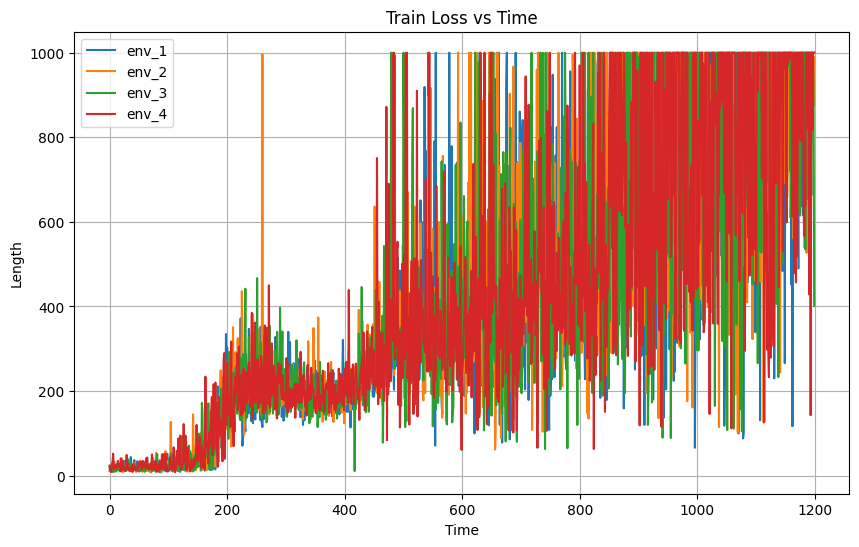

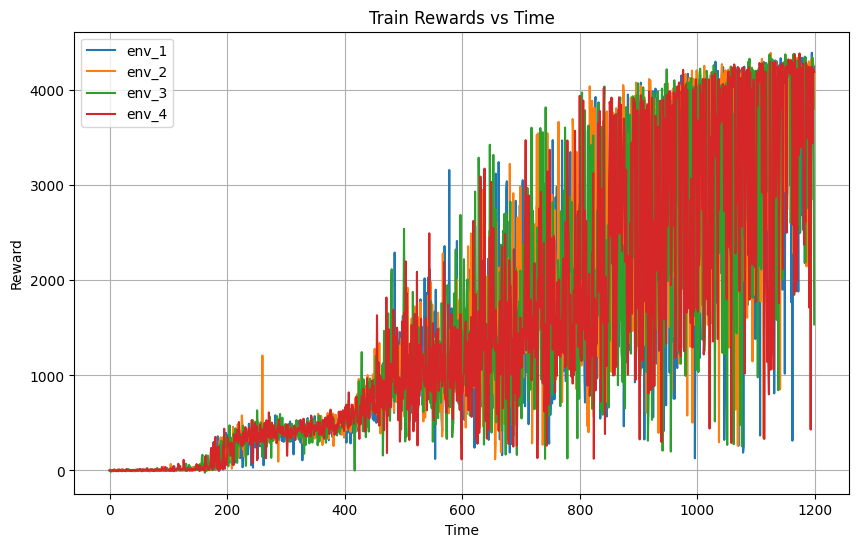

In [13]:
import matplotlib.pyplot as plt

# Plot: Loss vs. Time for combined data
plt.figure(figsize=(10, 6))
plt.title("Train Loss vs Time")
for idx, item in enumerate(combined_data):
    plt.plot(np.arange(len(item[:, -1])), item[:, -2], label=f"env_{idx + 1}")  # Time vs. Loss
plt.xlabel("Time")
plt.ylabel("Length")
plt.legend()
plt.grid(True)
plt.show()

# Plot: Reward vs. Time for combined data
plt.figure(figsize=(10, 6))
plt.title("Train Rewards vs Time")
for idx, item in enumerate(combined_data):
    plt.plot(np.arange(len(item[:, -1])), item[:, -3], label=f"env_{idx + 1}")  # Time vs. Reward
plt.xlabel("Time")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()


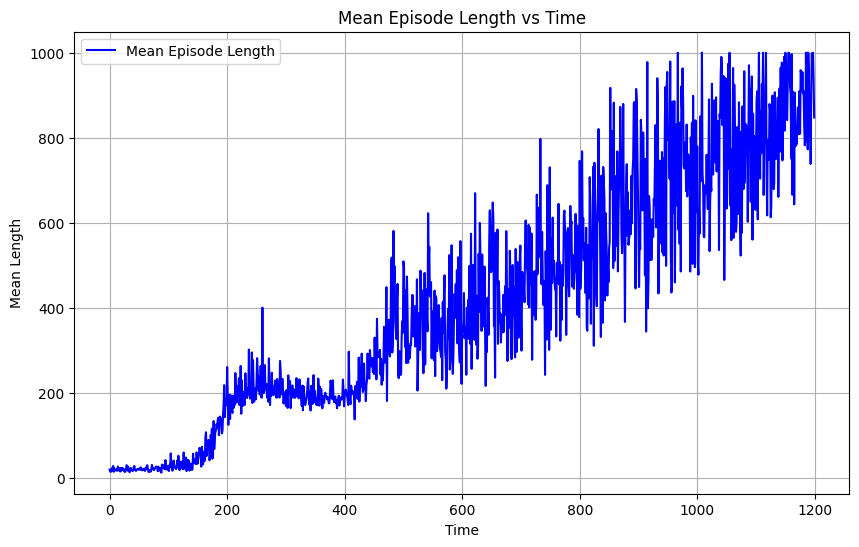

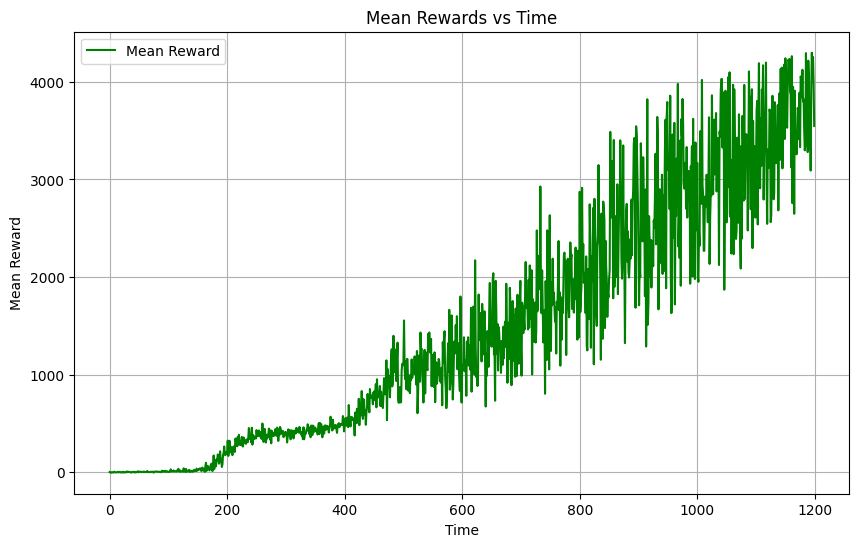

In [14]:
# Calculate the mean across all 4 environments
mean_loss = np.mean([item[:, -2] for item in combined_data], axis=0)  # Mean over loss values
mean_reward = np.mean([item[:, -3] for item in combined_data], axis=0)  # Mean over reward values
time = combined_data[0][:, -1]  # Time from any of the arrays (they should all be the same)

# Plot: Mean Loss vs. Time
plt.figure(figsize=(10, 6))
plt.title("Mean Episode Length vs Time")
plt.plot( mean_loss, label="Mean Episode Length", color='b')
plt.xlabel("Time")
plt.ylabel("Mean Length")
plt.legend()
plt.grid(True)
plt.show()

# Plot: Mean Reward vs. Time
plt.figure(figsize=(10, 6))
plt.title("Mean Rewards vs Time")
plt.plot( mean_reward, label="Mean Reward", color='g')
plt.xlabel("Time")
plt.ylabel("Mean Reward")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
eval_logs_path = "logs/content/logs/ppo/Walker2d-v4_4/Walker2d-v4.zip"
eval_data = np.load(eval_logs_path)

In [16]:
eval_data["data"]

b'{\n    "policy_class": {\n        ":type:": "<class \'abc.ABCMeta\'>",\n        ":serialized:": "gAWVOwAAAAAAAACMIXN0YWJsZV9iYXNlbGluZXMzLmNvbW1vbi5wb2xpY2llc5SMEUFjdG9yQ3JpdGljUG9saWN5lJOULg==",\n        "__module__": "stable_baselines3.common.policies",\n        "__doc__": "\\n    Policy class for actor-critic algorithms (has both policy and value prediction).\\n    Used by A2C, PPO and the likes.\\n\\n    :param observation_space: Observation space\\n    :param action_space: Action space\\n    :param lr_schedule: Learning rate schedule (could be constant)\\n    :param net_arch: The specification of the policy and value networks.\\n    :param activation_fn: Activation function\\n    :param ortho_init: Whether to use or not orthogonal initialization\\n    :param use_sde: Whether to use State Dependent Exploration or not\\n    :param log_std_init: Initial value for the log standard deviation\\n    :param full_std: Whether to use (n_features x n_actions) parameters\\n        for the s